# Checking for Overfitting During Model Training
This notebook creates simple plots for checking for overfitting based on loss on training and validation data that is checkpointed during model training. I didn't do frequent checkpointing, so this is mainly a sanity check. 

In [6]:
import json
from pathlib import Path

import pandas as pd 
import matplotlib.pyplot as plt 

MODEL_ROOTS = [
    "../data/models/hyperparam_tuning_1/", 
    "../data/models/hyperparam_tuning_2/",
    "../data/models/hyperparam_tuning_3/",
    "../data/models/hyperparam_tuning_4/",
    "../data/models/hyperparam_tuning_5/",
]

MODEL_FOLDER = "wav2vec2-large-xlsr-buckeye-ipa"

CHECKPOINT_FILE = "trainer_state.json"


In [2]:
def extract_train_val_loss_from_json(json_path):
    # store pairs of (epoch, loss) to plot
    train_chkpts = []
    val_chkpts = []
    with open(json_path) as jsonf: 
        trainer_state = json.load(jsonf)
        checkpoints = trainer_state["log_history"]
        for checkpoint_dict in checkpoints:
            epoch = checkpoint_dict["epoch"]
            if "loss" in checkpoint_dict:
                train_chkpts.append((epoch, checkpoint_dict["loss"]))
            if "eval_loss" in checkpoint_dict:
                val_chkpts.append((epoch, checkpoint_dict["eval_loss"]))
    return train_chkpts, val_chkpts

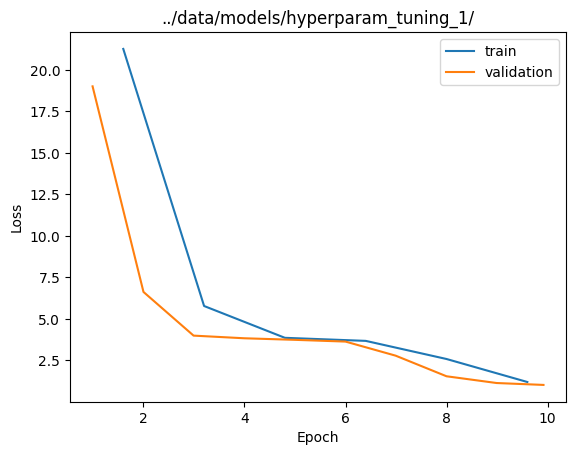

<Figure size 640x480 with 0 Axes>

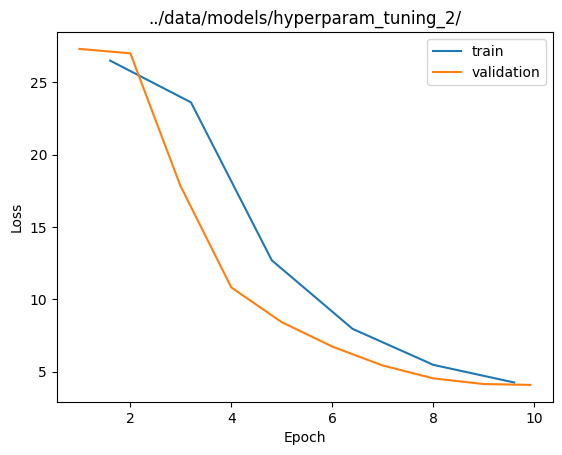

<Figure size 640x480 with 0 Axes>

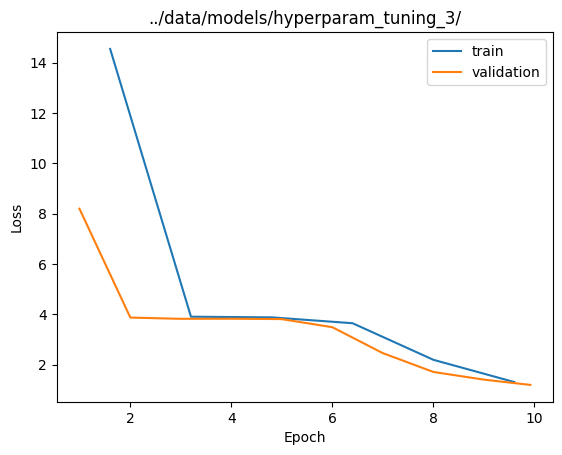

<Figure size 640x480 with 0 Axes>

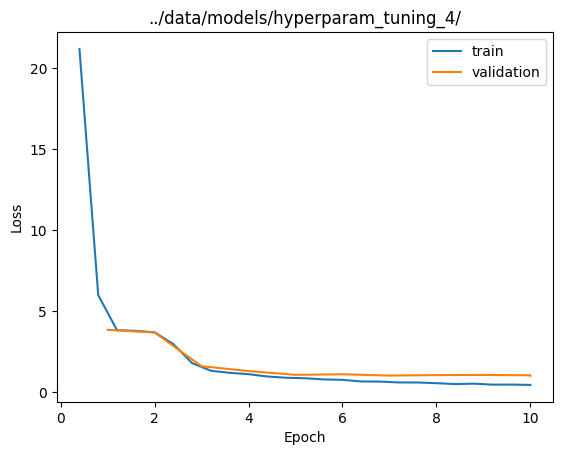

<Figure size 640x480 with 0 Axes>

In [8]:
# Actually create and display a plot for each model
for m in MODEL_ROOTS:
    model_path = Path(m)
    train_chkpts, val_chkpts = extract_train_val_loss_from_json(model_path / MODEL_FOLDER/ CHECKPOINT_FILE)

    train_x, train_y = zip(*train_chkpts)
    val_x, val_y = zip(*val_chkpts)
    
    fig = plt.figure()
    plt.plot(train_x, train_y, label="train")
    plt.plot(val_x, val_y, label="validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(m)
    plt.legend()
    plt.show()
    plt.clf()
    